<a href="https://colab.research.google.com/github/Deepakk200/colab_python/blob/main/fuelconsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv -o FuelConsumptionCo2.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 72629  100 72629    0     0   131k      0 --:--:-- --:--:-- --:--:--  131k


In [4]:
!ls
!ls -l FuelConsumptionCo2.csv

FuelConsumptionCo2.csv	sample_data
-rw-r--r-- 1 root root 72629 Apr  1 13:46 FuelConsumptionCo2.csv


In [20]:
!pip install pandas
!pip install numpy
!pip install matplotlib


In [6]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
df.describe()


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS' ]]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


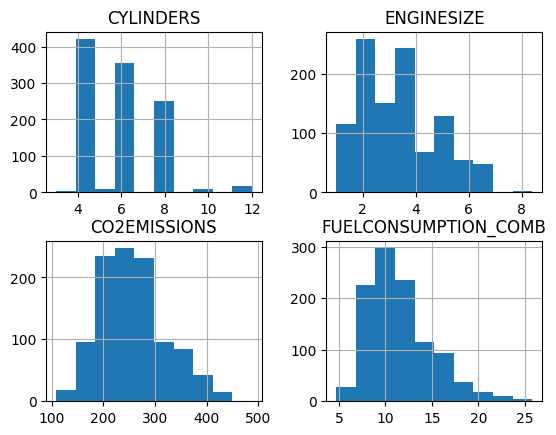

In [21]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
# pd.plotting.scatter_matrix(viz)
plt.show()

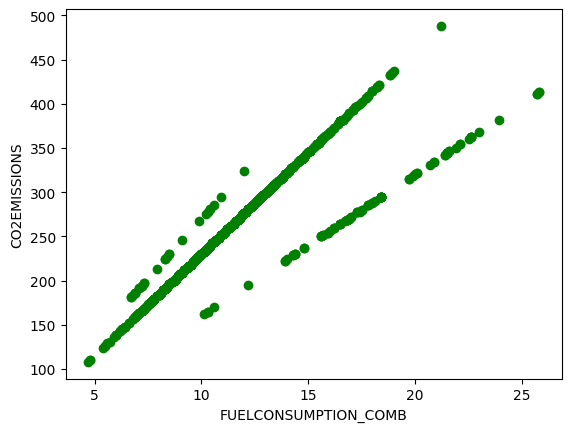

In [19]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='green')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

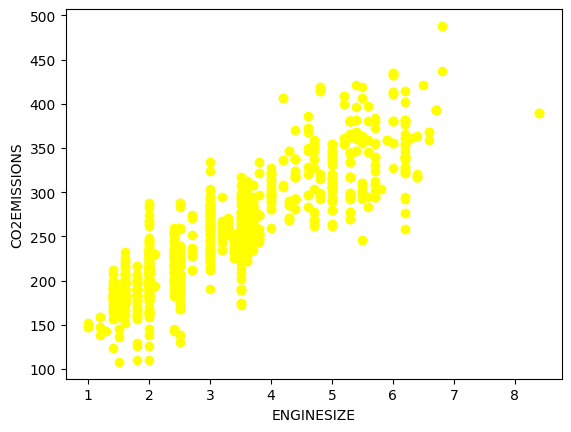

In [22]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color = 'yellow')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

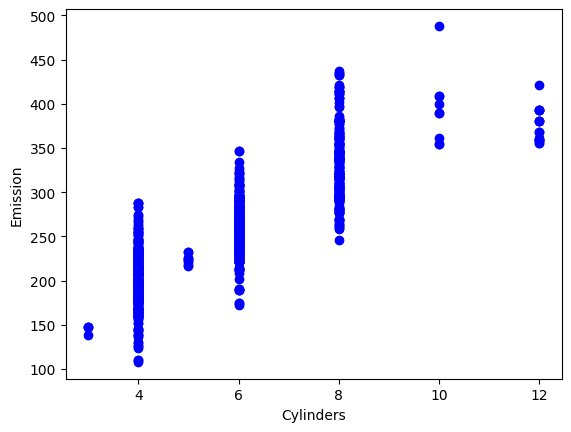

In [23]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()


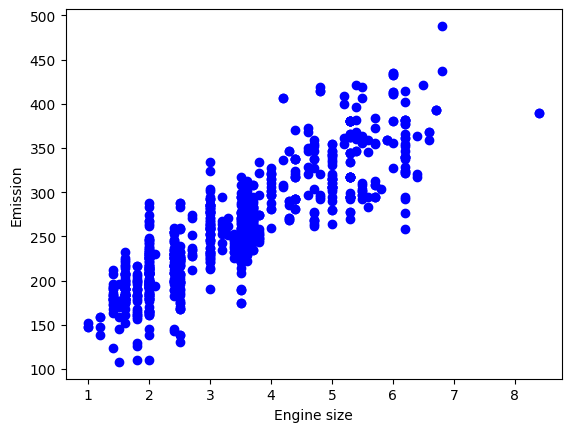

In [27]:
"""Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive.
After which, you train with the training set and test with the testing set. This will provide a more accurate
evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used
to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.
This means that we know the outcome of each data point in the testing dataset, making it great to test with!
Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points.
So, in essence, it is truly an out-of-sample testing.Let's split our dataset into train and test sets.
80% of the entire dataset will be used for training and 20% for testing.
We create a mask to select random rows using np.random.rand() function"""

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()


In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.34781554]]
Intercept:  [125.01152357]
